# Latihan Linreg

In [6]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### misal di case ini kita mau predict harga rumah di desa iwangijo🏡

In [8]:
# buat datanya
kamar = np.array([1,1,2,3,4,4,5,3,2,2,4,4,5])
# harga dalam juta
harga_rumah = np.array([140,198,250,280,340,335,500,320,220,266,349,413,521])

In [9]:
# kita dapat melihat visualisasinya dg plot scatter
import matplotlib.pyplot as plt

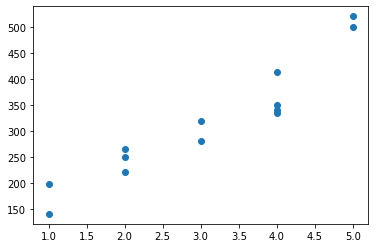

In [11]:
plt.scatter(kamar,harga_rumah);

In [12]:
# oke skarang mari kita latih modelnya
from sklearn.linear_model import LinearRegression

In [13]:
kamar = kamar.reshape(-1,1)

In [14]:
kamar

array([[1],
       [1],
       [2],
       [3],
       [4],
       [4],
       [5],
       [3],
       [2],
       [2],
       [4],
       [4],
       [5]])

In [16]:
model = LinearRegression()
model.fit(kamar,harga_rumah)

LinearRegression()

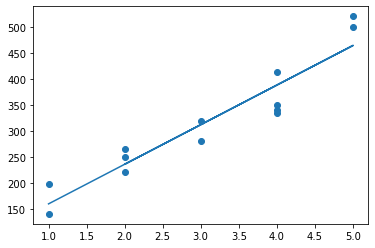

In [18]:
plt.scatter(kamar,harga_rumah)
plt.plot(kamar,model.predict(kamar));

Model ini memiliki kompleksitas rendah dan bekerja sangat baik pada dataset yang memiliki hubungan linier. Jadi, ketika Anda menemui masalah yang terlihat memiliki hubungan linier, regresi linier dapat menjadi pilihan pertama sebagai model untuk dikembangkan.

# Latihan Logreg

In [21]:
df = pd.read_csv(r'D:\Dsains project\Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
# melihat ingpo datasetnya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [24]:
df.drop(columns=['User ID'],inplace=True)

In [31]:
# kita lakukan encoding dulu agar bisa di scalling
df = pd.get_dummies(df)

In [43]:
X = df.drop(columns="Purchased")
y = df.Purchased

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 4), (80, 4), (320,), (80,))

In [37]:
# melakukan normalisasi data karena hal ini penting di algoritma berbasis linear dkk
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [45]:
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression()

In [46]:
model.fit(X_train,y_train)
# lalu uji akurasi model kita
model.score(X_test,y_test)

0.6

#### oke hasilnya tu jelek banget coba kita pake flow yg biasa dipake, mana tau bagus 😅 

In [48]:
df = pd.read_csv(r'D:\Dsains project\Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [60]:
X = df.drop(columns="Purchased")
y = df.Purchased

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 3), (80, 3), (320,), (80,))

In [61]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [62]:
num_pipe = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler()),    
])

In [63]:
cat_pipe = Pipeline([
    ('onehot',OneHotEncoder())    
])

In [64]:
X_train.columns

Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')

In [66]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe, ['Age','EstimatedSalary']),
    ('categoric', cat_pipe, ['Gender']),
])

In [67]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

model = RandomizedSearchCV(pipeline, rsp.logreg_params, cv=3, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'algo__C': 0.01260691251837407, 'algo__fit_intercept': False}
0.840625 0.8499970610709457 0.8


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   19.2s finished


### MANGTAP jadi bagus scorenya ewkwkkwkwk 😁

# Latihan K-means

In [72]:
df = pd.read_csv(r'D:\Dsains project\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [73]:
# ubah nama kolom agar seragam
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
 
# ubah data kategorik menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
 
# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


Di tahap selanjutnya kita akan mengimpor K-Means. Di tahap ini juga kita akan menghilangkan kolom Customer ID dan gender karena kurang relevan untuk proses clustering. Selanjutnya kita akan menentukan nilai K yang optimal dengan metode Elbow.  Di sini kita akan membuat list yang berisi inersia dari nilai K antara 1 sampai 11. 

In [75]:
from sklearn.cluster import KMeans
 
# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)
 
#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

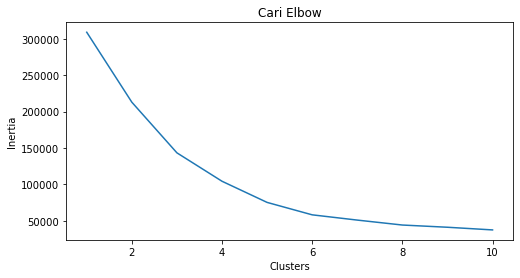

In [76]:
import seaborn as sns
 
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

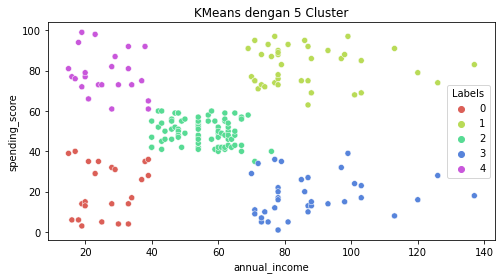

In [77]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)
 
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

# Latihan PCA

In [79]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
 
iris = datasets.load_iris()
atribut = iris.data
label = iris.target
 
# bagi dataset menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(
    atribut, label, test_size=0.2, random_state=1)

#### akurasi tanpa mengguanakan PCA

In [80]:
from sklearn import tree
 
decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(X_train, y_train)
model_pertama.score(X_test, y_test)

0.9666666666666667

#### akurasi mengguanakan PCA  dan menghitung variance dari setiap atribut.

In [83]:
from sklearn.decomposition import PCA
 
# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)
 
# mengaplikasikan PCA pada dataset
pca_attributes = pca.fit_transform(X_train)
 
# melihat variance dari setiap atribut
pca.explained_variance_ratio_

array([0.92848323, 0.04764372, 0.01931005, 0.004563  ])

Melihat dari variance sebelumnya kita bisa mengambil 2 principal component terbaik karena total variance nya adalah 0.976 yang sudah cukup tinggi.

In [85]:
# PCA dengan 2 principal component
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [86]:
# uji akurasi classifier
model2 = decision_tree.fit(X_train_pca, y_train)
model2.score(X_test_pca, y_test)

0.9333333333333333

Dari percobaan di atas bisa kita lihat bahwa dengan hanya 2 principal component atau 2 atribut saja model masih memiliki akurasi yang tinggi. Dengan principal component kamu bisa mengurangi atribut yang kurang signifikan dalam prediksi dan mempercepat waktu pelatihan sebuah model machine learning.